<div style="background:black">
    <center>
<img src="./images/session2/title.png" alt="Title"/>
    </center>
</div>


<div class="alert alert-block alert-success">
<center>
Today's objectives:<br/><br/>
    </center>
    &#x25a2; Get familiar with <b>unsupervised clustering</b><br/>
    &#x25a2; Understand the <b>kmeans</b> algorithm <br/><br/>
    &#x25a2; Practice with Spark <b>RDDs</b><br/>
    &#x25a2; Try <b>Spark's MLlib clustering</b> library <br/>
    &#x25a2; Apply unsupervised clustering to find <b>geographical clusters</b>
</div>


# Unsupervised clustering: the kmeans algorithm

See slides [here](pdf/session2/clustering.pdf).

## Sequential implementation

<div class="alert alert-block alert-info">
<center>
    In this section, we will implement a <b>sequential</b> version of kmeans in Python.<br/>
    In the next section, we will <b>parallelize</b> it in Spark.
</center>
</div>

We will test our implementations on 1,000 simulated 2D points:

In [1]:
! head 'data/session2/simulated-points.txt'

-5.97607109113 -2.55353952794
-5.38734256215 -2.47696382178
5.78173311542 6.05513306539
3.1837670379 -6.30133120737
8.74033072326 3.28212894002
9.3517345901 0.433742626959
8.68421704008 5.47249738016
2.66317680652 5.49858776468
0.448237220133 -0.70544622345
-0.560797910652 -0.632465365438


For convenience, the <code>utils</code> module contains:

(1) A data reader:

In [3]:
import utils
data_file = 'data/session2/simulated-points.txt'

data_points = utils.read_data(data_file)
data_points[:10]

[(-5.97607109113, -2.55353952794),
 (-5.38734256215, -2.47696382178),
 (5.78173311542, 6.05513306539),
 (3.1837670379, -6.30133120737),
 (8.74033072326, 3.28212894002),
 (9.3517345901, 0.433742626959),
 (8.68421704008, 5.47249738016),
 (2.66317680652, 5.49858776468),
 (0.448237220133, -0.70544622345),
 (-0.560797910652, -0.632465365438)]

(2) A data viewer:

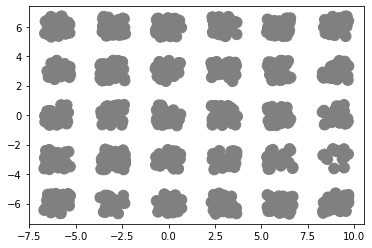

In [32]:
plt = utils.plot_data(data_points, initial_centroids=[], new_centroids=[])
plt.show()

<center>
<div class="alert alert-block alert-info">
<b>Step 1:</b> Initialization <br/>
    </div>
    </center>

<ul style="list-style-image: url('images/do.png');">
<li>Implement function <code>init_centroids</code> as documented in its docstring. Tip: use Python's <code>random.sample</code>. Test your function with k=30.</li>
</ul>

In [5]:
import random

def init_centroids(data_points, k):
    '''
    Parameters
    ----------
    data_points : data points, as returned by utils.read_data
    k : desired number of centroids

    Returns
    -------
    centroids: a list containing k tuples representing centroids. Example for k=2: [(1,4), (5, 7)]
    '''

In [6]:
import random

def init_centroids(data_points, k):
    '''
    Parameters
    ----------
    data_points : data points, as returned by utils.read_data
    k : desired number of centroids

    Returns
    -------
    centroids: a list containing k tuples representing centroids. Example for k=2: [(1,4), (5, 7)]
    '''
    
    return random.sample(data_points, k)

In [7]:
# Test function
k = 30
centroids = init_centroids(data_points, k)
# Check results
centroids[:5]

[(9.18927482253, 6.47339010085),
 (9.59416050312, -0.565487328319),
 (2.4307555433, -0.433434478094),
 (0.587364645393, 6.41704867576),
 (-2.44916637694, -2.37665021931)]

You can use <code>utls.plot_data</code> to plot your centroids in black over the gray data points:

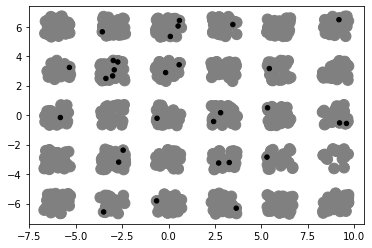

In [8]:
# Visualize
plt = utils.plot_data(data_points, initial_centroids=centroids)
plt.show()

<center>
<div class="alert alert-block alert-info">
<b>Step 2:</b> Point assignment to clusters <br/>
    </div>
    </center>

To assign points to clusters, we first need a distance function.

<ul style="list-style-image: url('images/do.png');">
<li>Implement function <code>distance2</code> as documented in the docstring. Tip: the power operator in Python is **. Test your function.
    </ul>

In [10]:
def distance2(x, y):
    '''
    Parameters
    ----------
    x : a tuple of length 2 representing a data point. Example: (1, 2)
    y : a tuple of length 2 representing a data point. Example: (0, 1)

    Returns
    -------
    distance2: the squared Euclidean distance between x and y
    '''

In [11]:
def distance2(x, y):
    '''
    Parameters
    ----------
    x : a tuple of length 2 representing a data point. Example: (1, 2)
    y : a tuple of length 2 representing a data point. Example: (0, 1)

    Returns
    -------
    distance2: the squared Euclidean distance between x and y
    '''
    
    x1, x2 = x
    y1, y2 = y
    return (x1-y1)**2+(x2-y2)**2

In [12]:
distance2((0,1), (1,3))

5

<ul style="list-style-image: url('images/do.png');">
<li>Implement function <code>closest_class</code> as documented in the docstring. Tip: iterate on centroids using Python's <a href="https://docs.python.org/3/library/functions.html#enumerate"><code>enumerate</code></a>. Test your function.
    </ul>
    <a id="closest_class"/>

In [13]:
def closest_class(x, centroids):
    '''
    Parameters
    ----------
    x : a tuple of length 2 representing a data point. Example: (1, 2)
    centroids : a list of centroids represented as tuples. Example: [(0,0), (1,3)]

    Returns
    -------
    closest_class: index in centroids of the centroid closest to x
    '''

In [14]:
def closest_class(x, centroids):
    '''
    Parameters
    ----------
    x : a tuple of length 2 representing a data point. Example: (1, 2)
    centroids : a list of centroids represented as tuples. Example: [(0,0), (1,3)]

    Returns
    -------
    closest_class: index in centroids of the centroid closest to x
    '''
    
    shortest_distance = None
    closest_class = None
    for i, c in enumerate(centroids):
        d = distance2(x, centroids[i])
        if (shortest_distance is None) or (d < shortest_distance):
            closest_class = i
            shortest_distance = d
    return closest_class

In [15]:
closest_class((1,1), [(0,1), (1,1), (2,2)])

1

<ul style="list-style-image: url('images/do.png');">
<li>Implement function <code>assign_classes</code> as documented in the docstring. Tip: fill list <code>classes</code> with values returned by <code>closest_class</code>.
    </ul>

In [16]:
def assign_classes(data_points, centroids):
    '''
    Parameters
    ----------
    data_points : data points, as returned by utils.read_data
    centroids : a list of centroids represented as tuples. Example: [(0,0), (1,3)]

    Returns
    -------
    classes: a list such that classes[i] is the index of the centroid in centroids closest to data_points[i]
    '''


In [17]:
def assign_classes(data_points, centroids):
    '''
    Parameters
    ----------
    data_points : data points, as returned by utils.read_data
    centroids : a list of centroids represented as tuples. Example: [(0,0), (1,3)]

    Returns
    -------
    classes: a list such that classes[i] is the index of the centroid in centroids closest to data_points[i]
    '''
    
    classes = []
    for p in data_points:
        classes += [ closest_class(p, centroids) ]
    return classes

<ul style="list-style-image: url('images/do.png');">
<li>The following code plots the result of the first iteration of kmeans. Does it look correct?
    </ul>

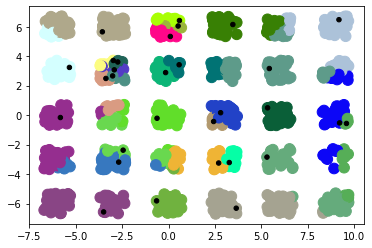

In [18]:
classes = assign_classes(data_points, centroids)
plt = utils.plot_data(data_points, initial_centroids=centroids, classes=classes)
plt.show()

<center>
<div class="alert alert-block alert-info">
<b>Step 3:</b> Centroid update<br/>
    </div>
    </center>

<ul style="list-style-image: url('images/do.png');">
<li>Implement function <code>update_centroids</code> as documented in the docstring.
    </ul>

In [20]:
def update_centroids(data_points, classes):
    '''
    Parameters
    ----------
    data_points : data points, as returned by utils.read_data
    classes : a list of class indices, returned by assign_classes. Example: [3, 0, 2, 1]

    Returns
    -------
    centroids: a list of tuples such that centroids[i] is the centroid of class i
    '''


In [21]:
def update_centroids(data_points, classes):
    '''
    Parameters
    ----------
    data_points : data points, as returned by utils.read_data
    classes : a list of class indices, returned by assign_classes. Example: [3, 0, 2, 1]

    Returns
    -------
    centroids: a list of tuples such that centroids[i] is the centroid of class i
    '''
        
    centroids = []
    for i in range(k):  # iterate over the classes
        cluster_points = [ p for j, p in enumerate(data_points) if classes[j]==i ] # list of points in class i
        if len(cluster_points) == 0:
            print('Warning: empty cluster')
            continue
        centroid_x = sum([x[0] for x in cluster_points]) / len(cluster_points) # average x coordinate in class i
        centroid_y = sum([x[1] for x in cluster_points]) / len(cluster_points) # average y coordinate in class i
        centroids += [ (centroid_x, centroid_y) ]
    return centroids

<ul style="list-style-image: url('images/do.png');">
<li>The following code plots the updated centroids. Do they look correct?
    </ul>

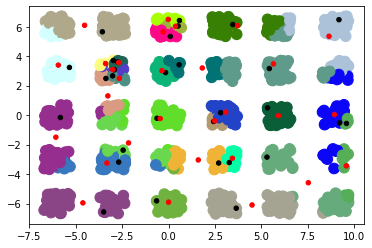

In [22]:
new_centroids = update_centroids(data_points, classes)
plt = utils.plot_data(data_points, initial_centroids=centroids, new_centroids=new_centroids, classes=classes)
plt.show()

<center>
<div class="alert alert-block alert-info">
<b>Step 4:</b> Putting it all together<br/>
    </div>
    </center>

<ul style="list-style-image: url('images/do.png');">
<li>We are now ready to implement the main kmeans loop. Fill in the blanks in the skeleton below with the functions implemented previously.
    </ul>

In [23]:
def kmeans(data_points, k, max_iter=100):
    '''
    Parameters
    ----------
    data_points : data points, as returned by utils.read_data
    k : desired number of centroids
    max_iter : maximum number of iterations after which function will raise an exception
    
    Returns
    -------
    None
    
    Raises
    ------
    exception: if main loop doesn't converge after max_iter iterations
    '''
    
    # Initialization
    initial_centroids = init_centroids(data_points, k)
    centroids = initial_centroids
    
    # Main loop
    for i in range(max_iter):
        print(f'kmeans iteration {i}')
        # Point assignment
        classes = assign_classes(data_points, centroids)
        # Centroid update
        new_centroids = update_centroids(data_points, classes)
        # Convergence test
        if sorted(new_centroids) == sorted(centroids):
            print(f'> Converged')
            return classes, initial_centroids, centroids
        centroids = new_centroids
    raise('x Not converged')

<ul style="list-style-image: url('images/do.png');">
<li>The following code plots the result of our kmeans implementation. Does it look correct?
</ul>
<a id="kmeans-seq"/>

kmeans iteration 0
kmeans iteration 1
kmeans iteration 2
kmeans iteration 3
kmeans iteration 4
kmeans iteration 5
kmeans iteration 6
kmeans iteration 7
kmeans iteration 8
kmeans iteration 9
kmeans iteration 10
kmeans iteration 11
kmeans iteration 12
kmeans iteration 13
kmeans iteration 14
kmeans iteration 15
kmeans iteration 16
kmeans iteration 17
kmeans iteration 18
> Converged


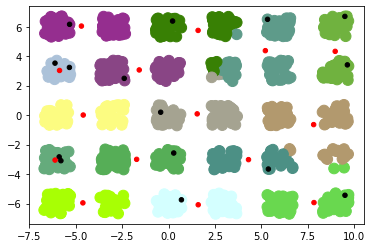

In [34]:
k = 15
classes, initial_centroids, final_centroids = kmeans(data_points, k)
plt = utils.plot_data(data_points, initial_centroids=initial_centroids, new_centroids=final_centroids, classes=classes)
plt.show()

## Quiz

<div class="alert alert-block alert-warning">
kmeans is dependent on initialization    

&#x25a2; True

&#x25a2; False
</div>

<div class="alert alert-block alert-warning">
kmeans is dependent on initialization    

&#x2611; True

&#x25a2; False
</div>
Run the last cell of <a href="#kmeans-seq">Section 1.1</a> multiple times for an illustration!

<div class="alert alert-block alert-info">
kmeans doesn't work with categorical data    

&#x25a2;  True

&#x25a2;  False
</div>

<div class="alert alert-block alert-info">
kmeans doesn't work with categorical data    

&#x2611; True

&#x2611; False
</div>

Why it doesn't work:
* Euclidean distance isn't meaningful
* the mean isn't a valid data point

Why it works:
* use a distance on categorical variables, such as the <a href="https://en.wikipedia.org/wiki/Jaccard_index">Jaccard distance</a>.
* use <a href="https://en.wikipedia.org/wiki/Medoid">medoids</a> instead of centroids.

Warning: convergence isn't guaranteed in this case!

<div class="alert alert-block alert-warning">

The time to run kmeans is proportional to the number of data points
    
&#x25a2; True

&#x25a2; False
</div>

<div class="alert alert-block alert-warning">

The time to run kmeans is proportional to the number of data points
    
&#x2611; True

&#x25a2; False
</div>

The time complexity of kmeans is O(<b>nkt</b>), where:
* <b>n</b> is the number of data points
* <b>k</b> is the number of clusters
* <b>t</b> is the number of iterations

Since <b>k</b> and <b>t</b> are small compared to <b>n</b>, the time complexity is almost linear in <b>n</b>.

<div class="alert alert-block alert-info">
The point assignment step is the most compute intensive, but it can be parallelized since assignments are done independently for each point.
    
&#x25a2;  True

&#x25a2;  False
</div>

<div class="alert alert-block alert-info">
The point assignment step is the most compute intensive, but it can be parallelized since assignments are done independently for each point.
    
&#x2611;  True

&#x25a2;  False
</div>

See next section!

# Parallel implementation in Spark

We will now use Apache Spark to run kmeans in parallel. We will:
1. Implement our own custom version
2. Use the implementation in Spark's machine-learning library

## Custom implementation

Differences with the sequential implementation:


<center>
    <div class="alert alert-block alert-info">
        <b>Data structures to update</b><br/>
    <ul style="list-style: none;">
        <li><code>data_points</code> will now be an RDD</li>
        <li><code>centroids</code> can remain a list</li>
    </ul><br/><br/>
        <b>Functions to re-implement</b><br/>
    <ul style="list-style: none;">
        <li><code>init_centroids</code></li>
        <li><code>assign_classes</code></li>
        <li><code>update_centroids</code></li>
    </ul>
    </div>
    </center>

First, let's create a Spark context:

In [35]:
# Create a Spark context
from pyspark.context import SparkContext
sc = SparkContext.getOrCreate()

Let's now parse the data in an RDD. Note the use of map functions to:
1. Split the lines by space
2. Convert point coordinates from string to float

In [36]:
# Parse data
data_points_rdd = sc.textFile('data/session2/simulated-points.txt')\
                    .map(lambda x: x.split(' '))\
                    .map(lambda x: (float(x[0]), float(x[1])))
# Check result
data_points_rdd.take(5)

[(-5.97607109113, -2.55353952794),
 (-5.38734256215, -2.47696382178),
 (5.78173311542, 6.05513306539),
 (3.1837670379, -6.30133120737),
 (8.74033072326, 3.28212894002)]

<center>
<div class="alert alert-block alert-info">
<b>Step 1:</b> Initialization <br/>
    </div>
    </center>

<ul style="list-style-image: url('images/do.png');">
<li>Implement function <code>init_centroids_spark</code> as documented in the docstring. Tip: use Sparks's <a href="https://spark.apache.org/docs/latest/api/python/pyspark.html"><code>takeSample</code></a> transformation. Test your function with k=30.</li>
</ul>

In [ ]:
def init_centroids_spark(data_points_rdd, k):
    '''
    Parameters
    ----------
    data_points_rdd : an RDD containing data points
    k : desired number of centroids

    Returns
    -------
    centroids: a list containing k tuples representing centroids. Example: [(1,4), (5, 7)]
    '''


In [37]:
def init_centroids_spark(data_points_rdd, k):
    '''
    Parameters
    ----------
    data_points_rdd : an RDD containing data points
    k : desired number of centroids

    Returns
    -------
    centroids: a list containing k tuples representing centroids. Example: [(1,4), (5, 7)]
    '''
    return data_points_rdd.takeSample(False, k)

In [38]:
# Test function
k = 30
centroids = init_centroids_spark(data_points_rdd, k)
# Check results
centroids[:3]

[(6.38143413536, 0.517224039389),
 (-6.34322290885, -5.42727435713),
 (-0.522981031722, 3.29183514755)]

You can use <code>utls.plot_data</code> to plot your centroids:

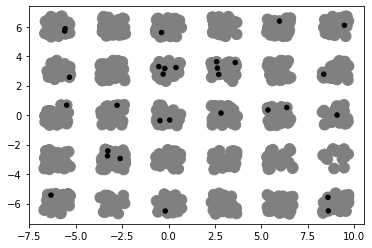

In [39]:
# Visualize
plt = utils.plot_data(data_points_rdd.collect(), initial_centroids=centroids)
plt.show()

<center>
<div class="alert alert-block alert-info">
<b>Step 2:</b> Point assignment to clusters <br/>
    </div>
    </center>

<ul style="list-style-image: url('images/do.png');">
<li>Implement function <code>assign_classes_spark</code> as documented in the docstring. 
    <ul>
        <li><b>Important:</b> make sure that the returned variable stricly complies to the format mentioned in the docstring. If it doesn't, the next steps won't work.</li>
        <li>Tip: use function <a href="#closest_class"><code>closest_class</code></a> from Section 1 and implement this with a single <code>map</code>!
    </ul>

In [40]:
def assign_classes_spark(data_points_rdd, centroids):
    '''
    Parameters
    ----------
    data_points_rdd : an RDD containing data points
    centroids : a list of centroids represented as tuples. Example: [(0,0), (1,3)]

    Returns
    -------
    classes: an RDD containing tuples (i, p) such that:
       p is a data point in data_points_rdd
       i is the index of the centroid in centroids which is closest to p
       Example: 
       [(23, (-5.97607109113, -2.55353952794)),
        (7, (-5.38734256215, -2.47696382178)),
        (12, (5.78173311542, 6.05513306539))]
    '''


In [41]:
def assign_classes_spark(data_points_rdd, centroids):
    '''
    Parameters
    ----------
    data_points_rdd : an RDD containing data points
    centroids : a list of centroids represented as tuples. Example: [(0,0), (1,3)]

    Returns
    -------
    classes: an RDD containing tuples (i, p) such that:
       p is a data point in data_points_rdd
       i is the index of the centroid in centroids which is closest to p
       Example: 
       [(23, (-5.97607109113, -2.55353952794)),
        (7, (-5.38734256215, -2.47696382178)),
        (12, (5.78173311542, 6.05513306539))]
    '''
    return data_points_rdd.map(lambda p: (closest_class(p, centroids),
                                          p)
                              )

Test your function as follows:

In [44]:
# Try function
classes_rdd = assign_classes_spark(data_points_rdd, centroids)
# Check result
classes_rdd.take(6)

[(10, (-5.97607109113, -2.55353952794)),
 (21, (-5.38734256215, -2.47696382178)),
 (4, (5.78173311542, 6.05513306539)),
 (27, (3.1837670379, -6.30133120737)),
 (3, (8.74033072326, 3.28212894002)),
 (13, (9.3517345901, 0.433742626959))]

Visualize the result of the first kmeans iteration:

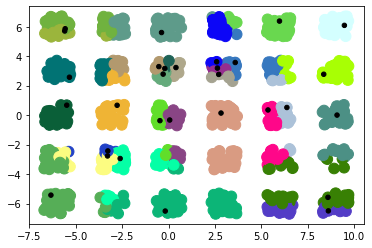

In [43]:
# Visualize result
plt = utils.plot_data(data_points_rdd.collect(),
                      initial_centroids=centroids,
                      classes=classes_rdd.map(lambda x: x[0]).collect())
plt.show()

<center>
<div class="alert alert-block alert-info">
<b>Step 3:</b> Centroid update<br/>
    </div>
    </center>

<ul style="list-style-image: url('images/do.png');">
    <li>Implement function <code>update_centroids</code> as documented in the docstring.</li>    
    </ul>

Suggested logic:
<ol>
    <li>map class <code>c</code> to key-value pairs <code>(i, (p, 1))</code>, where <code>i</code> is the class index (<code>c[0]</code>), and <code>p</code> is the data point (<code>c[1]</code>)</li>
    <li>reduce key-value pairs with <code>reduceByKey</code> to obtain pairs <code>(i, ((sum_x, sum_y), n))</code>, where <code>i</code> is a class index, <code>sum_x</code> is the sum of x coordinates of points in class <code>i</code>, <code>sum_y</code> is the sum of y coordinates of points in class <code>i</code>, and <code>n</code> is the number of points in class <code>i</code>.</li>
    <li>map these key-value pairs to <code>(i, centroid)</code>, by dividing <code>sum_x</code> and <code>sum_y</code> by <code>n</code>.</li>
</ol>

In [45]:
def update_centroids_spark(classes_rdd):
    '''
    Parameters
    ----------
    classes_rdd : an RDD containing tuples (i, p) such that:
       p is a data point in data_points_rdd
       i is the index of the centroid in centroids which is closest to p
       Example: 
       [(23, (-5.97607109113, -2.55353952794)),
        (7, (-5.38734256215, -2.47696382178)),
        (12, (5.78173311542, 6.05513306539))]
        
    Returns
    -------
    centroids: a list of tuples such that centroids[i] is the centroid of class i
    '''


In [46]:
def update_centroids_spark(classes_rdd):
    '''
    Parameters
    ----------
    classes_rdd : an RDD containing tuples (i, p) such that:
       p is a data point in data_points_rdd
       i is the index of the centroid in centroids which is closest to p
       Example: 
       [(23, (-5.97607109113, -2.55353952794)),
        (7, (-5.38734256215, -2.47696382178)),
        (12, (5.78173311542, 6.05513306539))]
        
    Returns
    -------
    centroids: a list of tuples such that centroids[i] is the centroid of class i
    '''
    
    summed_points = classes_rdd.map(lambda c: (c[0], (c[1], 1)))\
                               .reduceByKey(lambda x, y: ((x[0][0]+y[0][0],x[0][1]+y[0][1]), x[1]+y[1]))
    centroids = summed_points.map(lambda x: (x[1][0][0]/x[1][1], x[1][0][1]/x[1][1]) )
    return centroids.collect()

Test your function as follows:

In [47]:
# Test function
new_centroids = update_centroids_spark(classes_rdd)
# Check result
new_centroids[:3]

[(-4.339304335102728, -3.096773142721818),
 (5.594302886101591, 6.009794554802499),
 (2.7162880069376665, 5.746078422295333)]

Visualize the updated centroids:

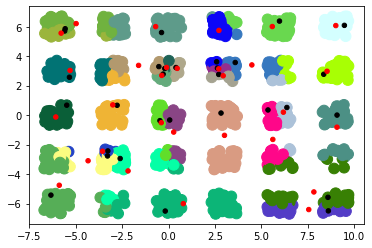

In [51]:
# Visualize
plt = utils.plot_data(data_points_rdd.collect(),
                      initial_centroids=centroids,
                      new_centroids=new_centroids,
                      classes=classes_rdd.map(lambda x: x[0]).collect())
plt.show()

<center>
<div class="alert alert-block alert-info">
<b>Step 4:</b> Putting it all together<br/>
    </div>
    </center>

The final kmeans function is identical to the sequential one, except that it calls the Spark versions of <code>init_centroids</code>, <code>assign_classes</code> and <code>update_centroids</code>:

In [52]:
def kmeans_spark(data_points_rdd, k, max_iter=100):
    '''
    Parameters
    ----------
    data_points_rdd : data_points_rdd : an RDD containing data points
    k : desired number of centroids
    max_iter : maximum number of iterations after which function will raise an exception
    
    Returns
    -------
    None
    
    Raises
    ------
    exception: if main loop doesn't converge after max_iter iterations
    '''
    
    # Initialization
    initial_centroids = init_centroids_spark(data_points_rdd, k)
    centroids = initial_centroids
    
    # Main loop
    for i in range(max_iter):
        print(f'kmeans iteration {i}')
        # Point assignment
        classes_rdd = assign_classes_spark(data_points_rdd, centroids)
        # Centroid update
        new_centroids = update_centroids_spark(classes_rdd)
        # Convergence test
        if sorted(new_centroids) == sorted(centroids):
            print(f'> Converged')
            return classes_rdd, initial_centroids, centroids
        centroids = new_centroids
    raise('x Not converged')

Test and visualize the result:

kmeans iteration 0
kmeans iteration 1
kmeans iteration 2
kmeans iteration 3
kmeans iteration 4
kmeans iteration 5
kmeans iteration 6
kmeans iteration 7
kmeans iteration 8
> Converged


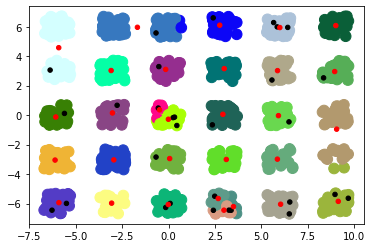

In [53]:
# Test function
classes_rdd, initial_centroids, final_centroids = kmeans_spark(data_points_rdd, k)
# Visualize results
plt = utils.plot_data(data_points_rdd.collect(),
                      initial_centroids=initial_centroids,
                      new_centroids=final_centroids, classes=classes_rdd.map(lambda x: x[0]).collect())
plt.show()

## Spark's Machine-Learning library

<center>
<div class="alert alert-block alert-info">
Spark implements many machine-learning methods, see <a href="http://spark.apache.org/docs/latest/ml-guide.html">here</a>.
    </div>
    </center>

We will use the KMeans implementation from the RDD-based MLLib.

Let's load the data in the format required by the library, an RDD of numeric numpy arrays:

In [54]:
# Load and parse the data
from numpy import array
data = sc.textFile("data/session2/simulated-points.txt")
parsedData = data.map(lambda line: array([float(x) for x in line.split(' ')]))

# Result sample
parsedData.take(3)

[array([-5.97607109, -2.55353953]),
 array([-5.38734256, -2.47696382]),
 array([5.78173312, 6.05513307])]

<ul style="list-style-image: url('images/do.png');">
    <li>Use the example <a href="http://spark.apache.org/docs/latest/mllib-clustering.html">here</a> to train a kmeans model called <code>model</code> from <code>parsedData</code>.</li>    
    </ul>

In [55]:
# Build the model (cluster the data)
from pyspark.mllib.clustering import KMeans, KMeansModel
k = 30
model = KMeans.train(parsedData, k, maxIterations=100, initializationMode="random")

A list of classes suitable for our visualization function can be obtained as follows:

In [56]:
# Associate classes to data points 
classes = parsedData.map(lambda x: model.predict(x)).collect()

# Result sample
classes[:3]

[5, 5, 7]

Visualization:

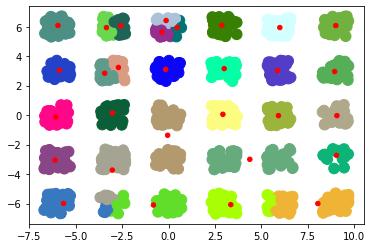

In [57]:
# Visualize results

plt = utils.plot_data(parsedData.collect(), new_centroids=model.centers, classes=classes)
plt.show()

## Quiz

<div class="alert alert-block alert-info">
Random centroid selection is the best way to initialize kmeans.
    
&#x25a2; True
    
&#x25a2; False
</div>

<div class="alert alert-block alert-info">
Random centroid selection is the best way to initialize kmeans.
    
&#x25a2; True
    
&#x2611; False
</div>

<code>kmeans++</code> and its parallel implementation <code>kmeans||</code> provides a better initialization, although at a higher computational cost.

<div class="alert alert-block alert-warning">
    To further improve our kmeans implementation, we could parallelize function <code>distance2</code>:
    
&#x25a2; True
    
&#x25a2; False
</div>


<div class="alert alert-block alert-warning">
    To further improve our kmeans implementation, we could parallelize function <code>distance2</code>:
    
&#x2611; True
    
&#x2611; False
</div>

Parallelizing distance computation would speed-up executions, but only for very high-dimensional data spaces.

# Mini-project: clustering geographical regions

<center>
<div class="alert alert-block alert-info">
    <b>Goal</b>: identify clusters of US states and Canadian provinces/territories based on their flora.
    </div>
    </center>

Data: US Department of Agriculture ([link](https://archive.ics.uci.edu/ml/datasets/Plants)), available in <code>data/session2/plants</code>.

Plausible results:
![Canada](data/session2/results.png)

In your context: plants $\rightarrow$ customer data.

## Data inspection

Main data file:

In [59]:
! head data/session2/plants/plants.data

abelia,fl,nc
abelia x grandiflora,fl,nc
abelmoschus,ct,dc,fl,hi,il,ky,la,md,mi,ms,nc,sc,va,pr,vi
abelmoschus esculentus,ct,dc,fl,il,ky,la,md,mi,ms,nc,sc,va,pr,vi
abelmoschus moschatus,hi,pr
abies,ak,az,ca,co,ct,ga,id,in,ia,me,md,ma,mi,mn,mt,nv,nh,nm,ny,nc,oh,or,pa,ri,tn,ut,vt,va,wa,wv,wi,wy,ab,bc,lb,mb,nb,nf,nt,ns,nu,on,pe,qc,sk,yt,fraspm
abies alba,nc
abies amabilis,ak,ca,or,wa,bc
abies balsamea,ct,in,ia,me,md,ma,mi,mn,nh,ny,oh,pa,ri,vt,va,wv,wi,ab,lb,mb,nb,nf,ns,nu,on,pe,qc,sk,fraspm
abies balsamea var. balsamea,ct,in,ia,me,md,ma,mi,mn,nh,ny,oh,pa,ri,vt,va,wv,wi,ab,lb,mb,nb,nf,ns,nu,on,pe,qc,sk,fraspm


State abbreviations:

In [60]:
! head data/session2/plants/stateabbr.txt

ab Alabama
ak Alaska
ar Arkansas
az Arizona
ca California
co Colorado
ct Connecticut
de Delaware
dc District of Columbia
fl Florida


## Helper functions

Implemented in module <code>utils</code>.

(1) Map plots, with colored states:

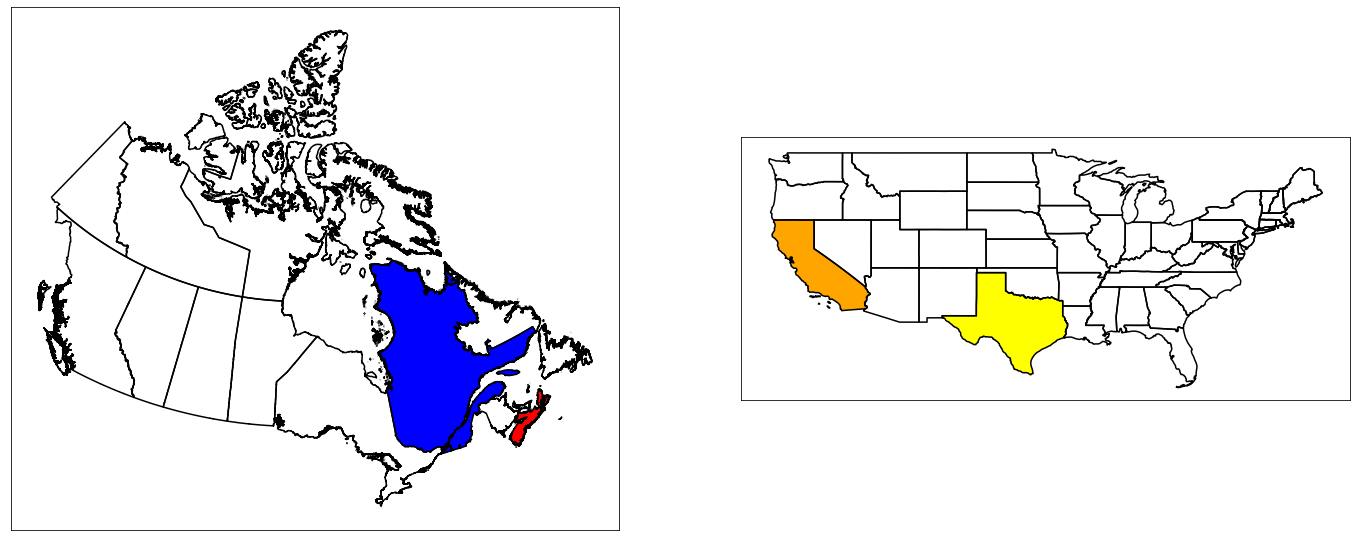

In [62]:
import utils
plt = utils.plot_states({'Quebec': 'blue', 'Nova Scotia': 'red', 'Texas': 'yellow', 'California': 'orange'})
plt.show()

<center>
<div class="alert alert-block alert-warning">
    <b>Note:</b> plotting takes a few seconds since the map of Canada, provided by Statistics Canada, is very (too) detailed for our purpose.
    </div>
    </center>

(2) Conversion from state abbreviations (used in the dataset) to state names (used for the plotting):

In [63]:
utils.convert_state('ca')

'California'

(3) Binary encoding of plant lists (returned as a numpy array):

In [65]:
utils.encode_plant_list(["abelia", "abies", "abies alba"])

array([1, 0, 0, ..., 0, 0, 0])

## Data preparation for Spark kmeans

Required: an **RDD of arrays containing numbers**.

In our case:
- RDD elements: states
- State arrays: binary encoding of the list of plants found in this state.

Let's first load our data as an RDD:

In [66]:
filename = 'data/session2/plants/plants.data'

# Create a Spark context
from pyspark.context import SparkContext
sc = SparkContext.getOrCreate()

# Load the text file
plant_rdd = sc.textFile(filename)

# See how the RDD looks like
plant_rdd.take(5)

['abelia,fl,nc',
 'abelia x grandiflora,fl,nc',
 'abelmoschus,ct,dc,fl,hi,il,ky,la,md,mi,ms,nc,sc,va,pr,vi',
 'abelmoschus esculentus,ct,dc,fl,il,ky,la,md,mi,ms,nc,sc,va,pr,vi',
 'abelmoschus moschatus,hi,pr']

Let's split the RDD elements by <code>,</code> using a <code>map</code> transformation:

In [67]:
# Use str.split to split the comma-separated string in each RDD element
plant_rdd = plant_rdd.map(lambda x: x.split(','))

# See how the RDD looks like
plant_rdd.take(2)

[['abelia', 'fl', 'nc'], ['abelia x grandiflora', 'fl', 'nc']]

<center>
<div class="alert alert-block alert-danger">
    Our RDD still has one element per <b>plant</b>. Instead, we want each RDD element to represent a <b>state</b>.
</div>
</center>

<ul style="list-style-image: url('images/do.png');">
    <li>Transform <code>plant_rdd</code> with a MapReduce job where:
        <ul>
            <li><code>map</code> produces <code>state,plant</code> pairs</li>
            <li><code>reduce</code> aggregates plant names by state</li>
        </ul>
    </li>

<center>
<div class="alert alert-block alert-info">
<b>Note:</b> this is akin to an inverted index
</div>
</center>

<center>
<div class="alert alert-block alert-info">
<code>map</code> produces multiple key-value pairs for each input element $\rightarrow$ use <code>flatMap</code>.
</div>
</center>

In [68]:
# Map step
plant_rdd = plant_rdd.flatMap(lambda x: [(x[i], x[0]) for i in range(1, len(x))] )

# See how the RDD looks like
plant_rdd.take(5)

[('fl', 'abelia'),
 ('nc', 'abelia'),
 ('fl', 'abelia x grandiflora'),
 ('nc', 'abelia x grandiflora'),
 ('ct', 'abelmoschus')]

In [69]:
# Reduce step
states_rdd = plant_rdd.groupByKey()

# See how the RDD looks like
states_rdd.map(lambda x: (x[0], list(x[1]))).take(5)

[('fl',
  ['abelia',
   'abelia x grandiflora',
   'abelmoschus',
   'abelmoschus esculentus',
   'abildgaardia',
   'abildgaardia ovata',
   'abrus',
   'abrus precatorius',
   'abutilon',
   'abutilon hirtum',
   'abutilon hulseanum',
   'abutilon permolle',
   'abutilon theophrasti',
   'acacia',
   'acacia angustissima',
   'acacia angustissima var. hirta',
   'acacia auriculiformis',
   'acacia choriophylla',
   'acacia cornigera',
   'acacia farnesiana',
   'acacia macracantha',
   'acacia pinetorum',
   'acacia retinodes',
   'acacia sphaerocephala',
   'acacia tortuosa',
   'acalypha',
   'acalypha alopecuroidea',
   'acalypha amentacea',
   'acalypha amentacea ssp. wilkesiana',
   'acalypha arvensis',
   'acalypha chamaedryfolia',
   'acalypha gracilens',
   'acalypha ostryifolia',
   'acalypha rhomboidea',
   'acalypha setosa',
   'acanthocereus',
   'acanthocereus tetragonus',
   'acanthospermum',
   'acanthospermum australe',
   'acanthospermum hispidum',
   'acanthospermum

<ul style="list-style-image: url('images/do.png');">
    <li>Use a <code>map</code> transformation to convert:
        <ul>
            <li>state abbreviations to names, using <code>utils.convert_state</code></li>
            <li>plant names to binary vectors, using <code>utils.encode_plant_list</code></li>
        </ul>
</ul>

In [70]:
import utils

states_rdd = states_rdd.map(lambda x: (utils.convert_state(x[0]),
                                       utils.encode_plant_list(list(x[1]))))
states_rdd.take(5)

[('Florida', array([1, 1, 1, ..., 0, 0, 0])),
 ('Connecticut', array([0, 0, 1, ..., 0, 0, 0])),
 ('District of Columbia', array([0, 0, 1, ..., 0, 0, 0])),
 ('Michigan', array([0, 0, 1, ..., 0, 0, 0])),
 ('South Carolina', array([0, 0, 1, ..., 0, 0, 0]))]

## kmeans classification

Our data is now ready for kmeans classification in Spark. 

<ul style="list-style-image: url('images/do.png');">
    <li>Use Spark's MLlib to classify <code>states_rdd</code> with kmeans. Tip: apply KMeans on an RDD created from <code>states_rdd</code> where the state name is removed</li>
    </ul>

In [71]:
from pyspark.mllib.clustering import KMeans, KMeansModel

# Remove state names from RDD
kmeans_input = states_rdd.map(lambda x: x[1])

# Build the model (cluster the data)
k = 10  # why not?
clusters = KMeans.train(kmeans_input, k, maxIterations=100)

<center>
<div class="alert alert-block alert-warning">
    <b>Note</b>: kmeans classification takes time but our program is ready for deployment on a large-scale cluster!
    </div>
    </center>

Finally, let's associate state names with class numbers:

In [72]:
classes = states_rdd.map(lambda x: (x[0], clusters.predict(x[1]))).collect()
classes

[('Florida', 6),
 ('Connecticut', 0),
 ('District of Columbia', 4),
 ('Michigan', 8),
 ('South Carolina', 6),
 ('Virginia', 6),
 ('Puerto Rico', 5),
 ('Virgin Islands', 5),
 ('Arizona', 3),
 ('California', 1),
 ('Colorado', 3),
 ('Georgia', 6),
 ('Indiana', 4),
 ('Minnesota', 8),
 ('Montana', 1),
 ('New Hampshire', 2),
 ('New Mexico', 3),
 ('New York', 0),
 ('Ohio', 4),
 ('Pennsylvania', 0),
 ('Rhode Island', 0),
 ('Vermont', 2),
 ('West Virginia', 4),
 ('Alabama', 1),
 ('British Columbia', 1),
 ('Newfoundland and Labrador', 5),
 ('New Brunswick', 2),
 ('Prince Edward Island', 5),
 ('Quebec', 8),
 ('Saskatchewan', 5),
 ('Yukon', 5),
 ('St. Pierre and Miquelon (France)', 5),
 ('Alberta', 6),
 ('Arkansas', 7),
 ('New Jersey', 0),
 ('Greenland (Denmark)', 5),
 ('Unknown', 5),
 ('North Carolina', 6),
 ('Hawaii', 5),
 ('Illinois', 4),
 ('Kentucky', 4),
 ('Louisiana', 6),
 ('Maryland', 0),
 ('Mississippi', 6),
 ('Alaska', 5),
 ('Idaho', 1),
 ('Iowa', 4),
 ('Maine', 2),
 ('Massachusetts', 0),

## Data vizualisation

Let's visualize the result:

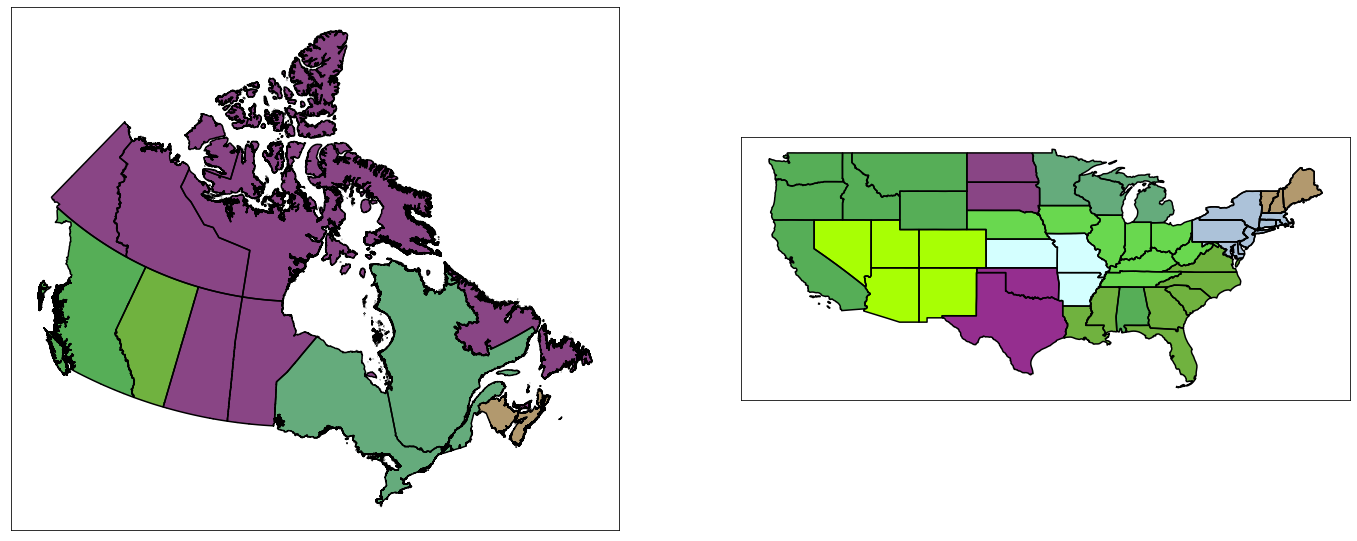

In [73]:
# Map class integers to color names
from matplotlib import colors as mcolors
colors = [ x for x in list(mcolors.XKCD_COLORS.keys()) ]
classes_dict = {}
for c in classes:
    classes_dict[c[0]] = colors[c[1]]

# Plot result
plt = utils.plot_states(classes_dict)
plt.show()

<center>
<div class="alert alert-block alert-info">
    <b>Evaluation:</b> does this result look relevant?
</div>
</center>

# Recap


<div class="alert alert-block alert-success">
    &#x2611; Get familiar with <b>unsupervised clustering</b><br/>
    &#x2611; Understand the <b>kmeans</b> algorithm
</div>
Implemented kmeans in Python

<div class="alert alert-block alert-success">
    &#x2611; Practice with Spark <b>RDDs</b><br/>
</div>
Implemented kmeans in Spark. Transformed geographical data to Spark's MLlib format.

<div class="alert alert-block alert-success">
    &#x2611; Try <b>Spark's MLlib clustering</b> library <br/>
    &#x2611; Apply unsupervised clustering to find <b>geographical clusters</b>
</div>
Clustered US states and Canadian provinces and territories from USDA plant dataset, using Spark's MLlib clustering library.